In [1]:
# 기본 packages loading
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt


In [3]:
# 분석할 데이터 셋 로딩
test_input1 = pd.read_csv('C:/Users/admin/Downloads/open/test_input/TEST_01.csv')
test_target1 = pd.read_csv('C:/Users/admin/Downloads/open/test_target/TEST_01.csv')
train_input1 = pd.read_csv('C:/Users/admin/Downloads/open/train_input/CASE_01.csv')
train_target1 = pd.read_csv('C:/Users/admin/Downloads/open/train_target/CASE_01.csv')

## Data exploration

In [7]:
test_input1.info(), test_target1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41760 entries, 0 to 41759
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   시간             41760 non-null  object 
 1   내부온도관측치        41759 non-null  float64
 2   내부습도관측치        41759 non-null  float64
 3   CO2관측치         41759 non-null  float64
 4   EC관측치          41759 non-null  float64
 5   외부온도관측치        41759 non-null  float64
 6   외부습도관측치        41759 non-null  float64
 7   펌프상태           41759 non-null  float64
 8   펌프작동남은시간       41759 non-null  float64
 9   최근분무량          41759 non-null  float64
 10  일간누적분무량        41759 non-null  float64
 11  냉방상태           41759 non-null  float64
 12  냉방작동남은시간       41759 non-null  float64
 13  난방상태           41759 non-null  float64
 14  난방작동남은시간       41759 non-null  float64
 15  내부유동팬상태        41759 non-null  float64
 16  내부유동팬작동남은시간    41759 non-null  float64
 17  외부환기팬상태        41759 non-null  float64
 18  외부환기팬작

(None, None)

In [8]:
test_target1

,시간,rate
0,2021-03-27 00:00:00,0
1,2021-03-28 00:00:00,0
2,2021-03-29 00:00:00,0
3,2021-03-30 00:00:00,0
4,2021-03-31 00:00:00,0
5,2021-04-01 00:00:00,0
6,2021-04-02 00:00:00,0
7,2021-04-03 00:00:00,0
8,2021-04-04 00:00:00,0
9,2021-04-05 00:00:00,0


In [10]:
test_input1.shape

(41760, 38)

In [13]:
# test_input1 컬럼명 확인
test_input1.columns
## 컬럼명이 모두 한국어임.

Index(['시간', '내부온도관측치', '내부습도관측치', 'CO2관측치', 'EC관측치', '외부온도관측치', '외부습도관측치',
       '펌프상태', '펌프작동남은시간', '최근분무량', '일간누적분무량', '냉방상태', '냉방작동남은시간', '난방상태',
       '난방작동남은시간', '내부유동팬상태', '내부유동팬작동남은시간', '외부환기팬상태', '외부환기팬작동남은시간',
       '화이트 LED상태', '화이트 LED작동남은시간', '화이트 LED동작강도', '레드 LED상태', '레드 LED작동남은시간',
       '레드 LED동작강도', '블루 LED상태', '블루 LED작동남은시간', '블루 LED동작강도', '카메라상태', '냉방온도',
       '난방온도', '기준온도', '난방부하', '냉방부하', '총추정광량', '백색광추정광량', '적색광추정광량',
       '청색광추정광량'],
      dtype='object')

In [25]:
train_input1.columns

Index(['시간', '내부온도관측치', '내부습도관측치', 'CO2관측치', 'EC관측치', '외부온도관측치', '외부습도관측치',
       '펌프상태', '펌프작동남은시간', '최근분무량', '일간누적분무량', '냉방상태', '냉방작동남은시간', '난방상태',
       '난방작동남은시간', '내부유동팬상태', '내부유동팬작동남은시간', '외부환기팬상태', '외부환기팬작동남은시간',
       '화이트 LED상태', '화이트 LED작동남은시간', '화이트 LED동작강도', '레드 LED상태', '레드 LED작동남은시간',
       '레드 LED동작강도', '블루 LED상태', '블루 LED작동남은시간', '블루 LED동작강도', '카메라상태', '냉방온도',
       '난방온도', '기준온도', '난방부하', '냉방부하', '총추정광량', '백색광추정광량', '적색광추정광량',
       '청색광추정광량'],
      dtype='object')

In [16]:
# 컬럼명 전환
test_input1.columns=['time', 'in_temp','in_hum', 'Co2','EC','out_temp',
                    'out_hum','pump_stat','pump_rest','r_sprayVol',
                     'd_sprayVol', 'cool_stat','cool_rest','heat_stat',
                    'heat_rest','in_fan','in_fen_rest','out_fan','out_fan_rest',
                    'wLED','wLED_rest','wLED_act','rLED','rLED_rest','rLED_act',
                    'bLED','bLED_rest','bLED_act','cam','cool_temp','heat_temp',
                    'stand_temp','heat_lose','cool_lose','tot_amount','w_amount',
                    'r_amount','b_amount']
test_input1.columns # 수정된 컬럼명 확인

Index(['time', 'in_temp', 'in_hum', 'Co2', 'EC', 'out_temp', 'out_hum',
       'pump_stat', 'pump_rest', 'r_sprayVol', 'd_sprayVol', 'cool_stat',
       'cool_rest', 'heat_stat', 'heat_rest', 'in_fan', 'in_fen_rest',
       'out_fan', 'out_fan_rest', 'wLED', 'wLED_rest', 'wLED_act', 'rLED',
       'rLED_rest', 'rLED_act', 'bLED', 'bLED_rest', 'bLED_act', 'cam',
       'cool_temp', 'heat_temp', 'stand_temp', 'heat_lose', 'cool_lose',
       'tot_amount', 'w_amount', 'r_amount', 'b_amount'],
      dtype='object')

In [26]:
train_input1.columns=['time', 'in_temp','in_hum', 'Co2','EC','out_temp',
                    'out_hum','pump_stat','pump_rest','r_sprayVol',
                     'd_sprayVol', 'cool_stat','cool_rest','heat_stat',
                    'heat_rest','in_fan','in_fen_rest','out_fan','out_fan_rest',
                    'wLED','wLED_rest','wLED_act','rLED','rLED_rest','rLED_act',
                    'bLED','bLED_rest','bLED_act','cam','cool_temp','heat_temp',
                    'stand_temp','heat_lose','cool_lose','tot_amount','w_amount',
                    'r_amount','b_amount']
train_input1.columns 

Index(['time', 'in_temp', 'in_hum', 'Co2', 'EC', 'out_temp', 'out_hum',
       'pump_stat', 'pump_rest', 'r_sprayVol', 'd_sprayVol', 'cool_stat',
       'cool_rest', 'heat_stat', 'heat_rest', 'in_fan', 'in_fen_rest',
       'out_fan', 'out_fan_rest', 'wLED', 'wLED_rest', 'wLED_act', 'rLED',
       'rLED_rest', 'rLED_act', 'bLED', 'bLED_rest', 'bLED_act', 'cam',
       'cool_temp', 'heat_temp', 'stand_temp', 'heat_lose', 'cool_lose',
       'tot_amount', 'w_amount', 'r_amount', 'b_amount'],
      dtype='object')

<function matplotlib.pyplot.show(close=None, block=None)>

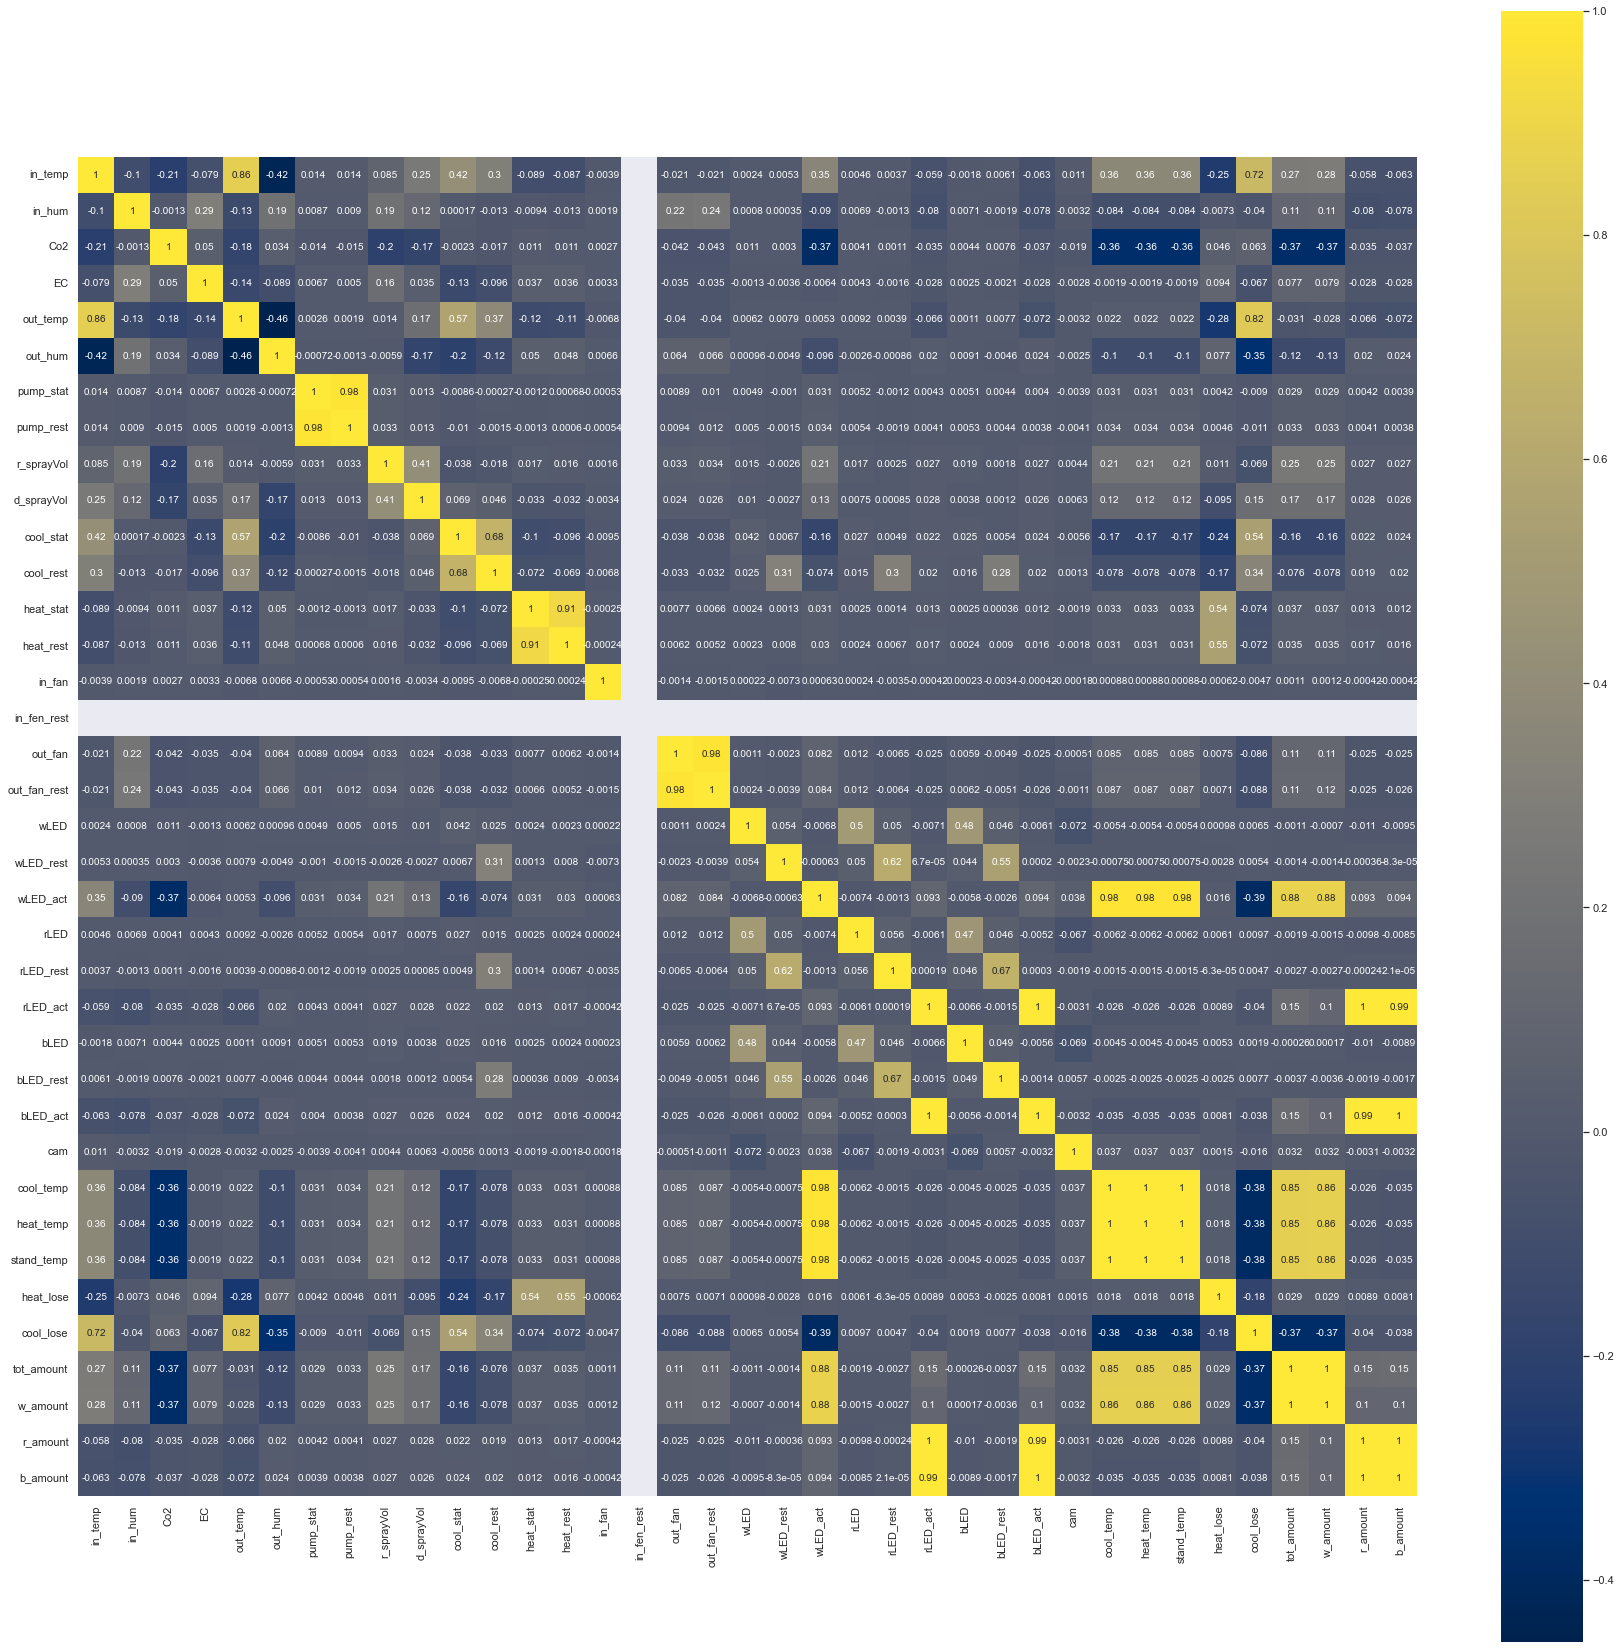

In [21]:
# 상관계수를 보기위한 히트맵
import seaborn as sns
test_data = test_input1[['in_temp','in_hum', 'Co2','EC','out_temp',
                    'out_hum','pump_stat','pump_rest','r_sprayVol',
                     'd_sprayVol', 'cool_stat','cool_rest','heat_stat',
                    'heat_rest','in_fan','in_fen_rest','out_fan','out_fan_rest',
                    'wLED','wLED_rest','wLED_act','rLED','rLED_rest','rLED_act',
                    'bLED','bLED_rest','bLED_act','cam','cool_temp','heat_temp',
                    'stand_temp','heat_lose','cool_lose','tot_amount','w_amount',
                    'r_amount','b_amount']]
# object객체인 시간을 제외한 컬럼들의 상관관계 시각화
sns.set(rc = {'figure.figsize':(30,30)})
sns.heatmap(test_data.corr(), vmax=1.0, square=True,
           cmap=plt.cm.cividis, linecolor='w', annot=True, annot_kws={'size':10})
plt.show

- 청경체 성장에 가장 상관관계가 높은 속성은 온도와 관련된 컬럼들임.
- 온도와 밀접한 연관이 있다고 판단할 수있는 광원속성의 컬럼들 또한 강한 양적 선형관계임을 확인함.
- 특이한점은 redled강도와 블루led의 총추정광원량이 강한 양적 선형관계를 뜀.(반대인 경우도 마찬가지) 
- 그리고 냉방온도, 난방온도, 기준온도들은 서로 완전 동일한 형태를 뜀.(토탈광원, 화이트광원/ 레드광원,블루광원도)

In [ ]:
# 상관r관계가 크다고 판단되는 변수들의 상관관계 시각화
test_corr = test_data.corr()

In [24]:
train_target1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   시간      29 non-null     object 
 1   rate    29 non-null     float64
dtypes: float64(1), object(1)
memory usage: 592.0+ bytes
